# BERTopic Evaluation

In [18]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired
from bertopic.representation import PartOfSpeech
from bertopic.representation import MaximalMarginalRelevance
from models.bertopic.utils.data_loader import DataLoader
from sklearn.feature_extraction.text import CountVectorizer

from models.bertopic.config.model import (STOPWORDS, NUM_TOPICS, TOP_K, EMBEDDING_MODEL, N_GRAMS,
                                          N_NEIGHBORS_DOCS, MIN_CLUSTER_SIZE_DOCS, MIN_SAMPLES_DOCS, TOP_N_WORDS, 
                                          N_NEIGHBORS_SENTENCES, MIN_CLUSTER_SIZE_SENTENCES)
                                          

from umap import UMAP
from hdbscan import HDBSCAN

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Import Data

In [2]:
loader = DataLoader('data/data_speeches.csv', 'data/data_statements.csv')
loader.process()

train_docs, train_sentences = loader.get_train_data()
test_docs, test_sentences = loader.get_test_data()
val_docs, val_sentences = loader.get_val_data()

# 2. initialize sub-models with parameters from config

Global sub-models:

In [3]:
vectorizer_model = CountVectorizer(stop_words=STOPWORDS,
                                   ngram_range=N_GRAMS)

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

Docs sub-models:

In [4]:
umap_model_docs = UMAP(n_neighbors=N_NEIGHBORS_DOCS)

hdbscan_model_docs = HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE_DOCS,
                             min_samples=MIN_SAMPLES_DOCS)

Sentences sub-models:

In [5]:
umap_model_sentences = UMAP(n_neighbors=N_NEIGHBORS_SENTENCES)

hdbscan_model_sentences = HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE_SENTENCES)

Representation Models

We will use 4 different representation models: KeyBERTInspired, PartOfSpeech and MaximalMarginalRelevance as well as a combination of KeyBERTInspired and MaximalMarginalRelevance.

In [8]:
main_representation_model = KeyBERTInspired()

aspect_model1 = PartOfSpeech("el_core_news_sm")
aspect_model2 = MaximalMarginalRelevance(diversity=0.3)
aspect_model3 = [KeyBERTInspired(top_n_words=30), MaximalMarginalRelevance(diversity=.5)]

representation_model = {
    "main": main_representation_model,
    "Aspect1": aspect_model1,
    "Aspect2": aspect_model2,
    "Aspect3": aspect_model3
}

# 3. Initialize models

In [9]:
model_docs = BERTopic(embedding_model = EMBEDDING_MODEL,
                      vectorizer_model=vectorizer_model,
                      ctfidf_model=ctfidf_model,
                      umap_model=umap_model_docs,
                      hdbscan_model=hdbscan_model_docs,
                      representation_model=representation_model,
                      nr_topics=NUM_TOPICS,
                      top_n_words=TOP_N_WORDS,
                      n_gram_range=N_GRAMS)

model_sentences = BERTopic(embedding_model = EMBEDDING_MODEL,
                      vectorizer_model=vectorizer_model,
                      ctfidf_model=ctfidf_model,
                      umap_model=umap_model_sentences,
                      hdbscan_model=hdbscan_model_sentences,
                      representation_model=representation_model,
                      nr_topics=NUM_TOPICS,
                      top_n_words=TOP_N_WORDS,
                      n_gram_range=N_GRAMS)


# 4. Fit models 

In [10]:
topics_docs, _ = model_docs.fit_transform(train_docs)
# topics_sentences, _ = model_sentences.fit_transform(train_sentences)

# 5 evauate model results, plots etc

In [11]:
model_docs.get_topic_info()

Topic  Count                                               Name  \
0      -1    332             -1_ελλάδα_δημοκρατίας_ευρώπη_κυπριακής   
1       0    287                            0_κι_χώρα_χρόνια_ελλάδα   
2       1    168                             1_ελλάδα_ευρώπη_de_que   
3       2     81                       2_έργα_έργο_ενέργειας_αερίου   
4       3     79                  3_ρουμανία_ελλάδα_ευρωπαϊκή_ένωση   
5       4     70  4_προστασίας_πολιτικής προστασίας_κάνουμε_υπου...   
6       5     41                        5_κίνα_δυο_κινεζική_σαμαράς   
7       6     38                    6_greece_democracy_reforms_time   
8       7     37                    7_ροές_πρόσφυγες_τουρκία_σύνορα   
9       8     32        8_επιχειρήσεις_ελλάδα_εταιρείες_οικοσύστημα   
10      9     31                       9_θεσσαλία_αγρότες_έργα_ευρώ   
11     10     30          10_σχολείο_εκπαίδευσης_εκπαίδευση_μαθητές   
12     11     27       11_brad_brad smith_κυριάκος μητσοτάκης_smith   
13     12     25  12_μπορούμε μιλάμε_οικονομικό χρηματοπιστωτικό...   
14     13     24                 13_περιφέρεια_ευρώ_πρόγραμμα_τομέα   
15     14     23                     14_τεστ_κρούσματα_στοιχεία_ιού   
16     15     23        15_επενδύσεων_ανάπτυξη_οικονομίας_οικονομία   
17     16     23          16_παναγίου τάφου_παναγίου_θεόφιλος_τάφου   
18     17     19      17_σεξουαλικής_παιδιών_κακοποίησης_σεξουαλική   
19     18     18      18_εαβ_rafale_αεροπορίας_πολεμικής αεροπορίας   
20     19     17                19_μουσείο_πολιτισμού_οακα_μουσείου   
21     20     17                20_υγείας_εμβολιασμού_ηδικα_εμβόλιο   
22     21     15  21_υγείας_συστήματος υγείας_νοσοκομείο_εθνικού...   
23     22     14                    22_εργασίας_εφκα_1555_υπερωρίες   
24     23     12          23_κάρτα_εμβολιασμού_εμβολιασμό_ιωαννίνων   
25     24     12                      24_κι_ελλάδα_θεσσαλονίκης_δεθ   
26     25     12           25_τουρισμού_τουρισμό_τουρισμός_εργασίας   
27     26     12      26_εμβολιασμού_εμβολιαστούν_υγείας_συμπολίτες   
28     27     10                       27_υγείας_νοσοκομείο_υπε_μεθ   
29     28     10                              28_γαλλίας_nous_de_et   

                                       Representation  \
0   [ελλάδα, δημοκρατίας, ευρώπη, κυπριακής, σήμερ...   
1   [κι, χώρα, χρόνια, ελλάδα, σήμερα, κυβέρνηση, ...   
2   [ελλάδα, ευρώπη, de, que, χρόνια, δημοκρατία, ...   
3   [έργα, έργο, ενέργειας, αερίου, φυσικού αερίου...   
4   [ρουμανία, ελλάδα, ευρωπαϊκή, ένωση, ευρωπαϊκή...   
5   [προστασίας, πολιτικής προστασίας, κάνουμε, υπ...   
6   [κίνα, δυο, κινεζική, σαμαράς, κίνας, βουλγαρί...   
7   [greece, democracy, reforms, time, people, cri...   
8   [ροές, πρόσφυγες, τουρκία, σύνορα, ευρωπαϊκή, ...   
9   [επιχειρήσεις, ελλάδα, εταιρείες, οικοσύστημα,...   
10  [θεσσαλία, αγρότες, έργα, ευρώ, τομέα, πρωτογε...   
11  [σχολείο, εκπαίδευσης, εκπαίδευση, μαθητές, αν...   
12  [brad, brad smith, κυριάκος μητσοτάκης, smith,...   
13  [μπορούμε μιλάμε, οικονομικό χρηματοπιστωτικό,...   
14  [περιφέρεια, ευρώ, πρόγραμμα, τομέα, εκατ, περ...   
15  [τεστ, κρούσματα, στοιχεία, ιού, μάσκα, εμβόλι...   
16  [επενδύσεων, ανάπτυξη, οικονομίας, οικονομία, ...   
17  [παναγίου τάφου, παναγίου, θεόφιλος, τάφου, εκ...   
18  [σεξουαλικής, παιδιών, κακοποίησης, σεξουαλική...   
19  [εαβ, rafale, αεροπορίας, πολεμικής αεροπορίας...   
20  [μουσείο, πολιτισμού, οακα, μουσείου, τέχνης, ...   
21  [υγείας, εμβολιασμού, ηδικα, εμβόλιο, συνταγογ...   
22  [υγείας, συστήματος υγείας, νοσοκομείο, εθνικο...   
23  [εργασίας, εφκα, 1555, υπερωρίες, εργασία, πολ...   
24  [κάρτα, εμβολιασμού, εμβολιασμό, ιωαννίνων, οπ...   
25  [κι, ελλάδα, θεσσαλονίκης, δεθ, συριζα, χώρα, ...   
26  [τουρισμού, τουρισμό, τουρισμός, εργασίας, επι...   
27  [εμβολιασμού, εμβολιαστούν, υγείας, συμπολίτες...   
28  [υγείας, νοσοκομείο, υπε, μεθ, κλίνες, προσωπι...   
29  [γαλλίας, nous, de, et, la, γαλλία, est, les, ...   

                                  

In [12]:
model_docs.visualize_hierarchy()

In [13]:
model_docs.visualize_heatmap()

In [20]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

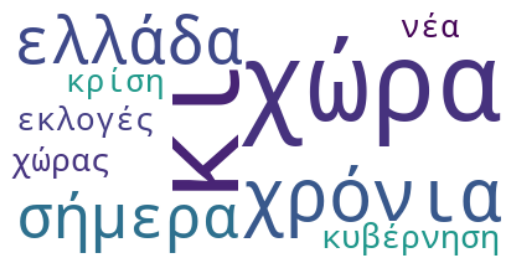

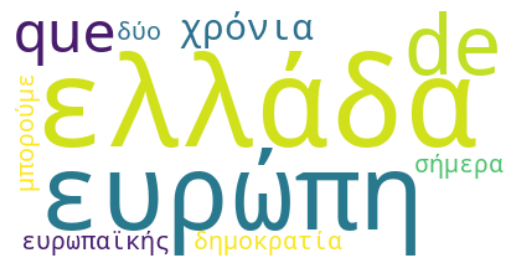

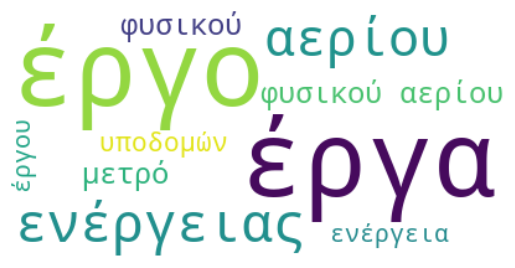

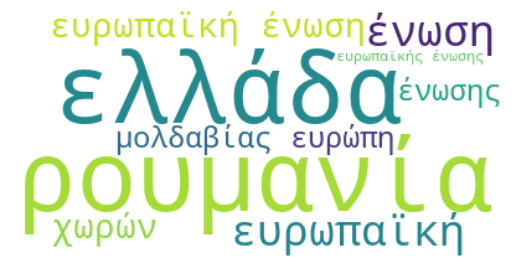

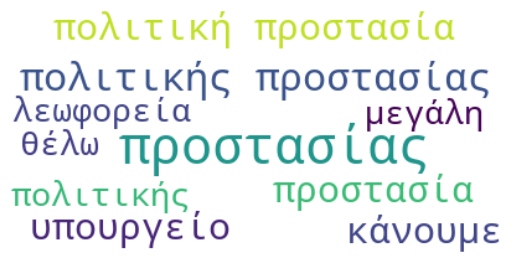

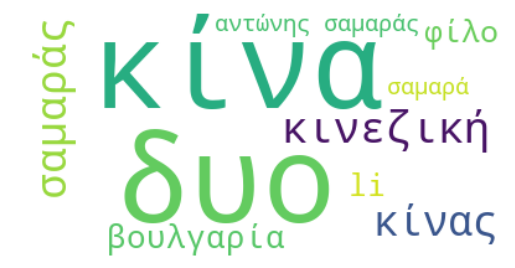

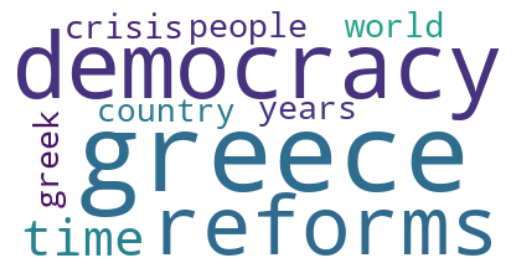

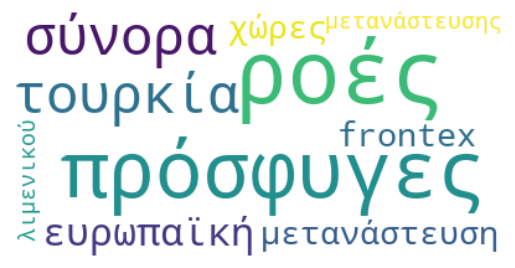

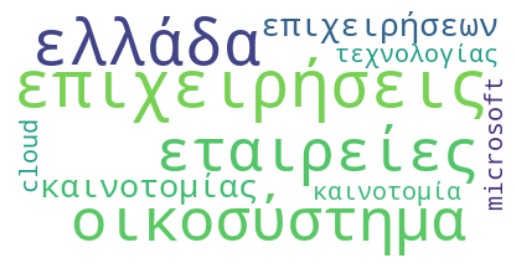

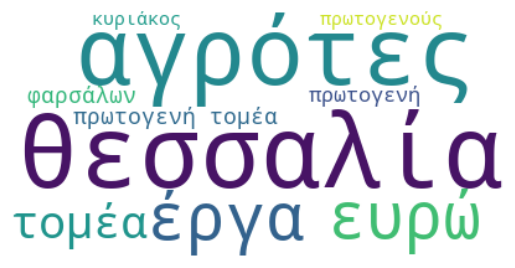

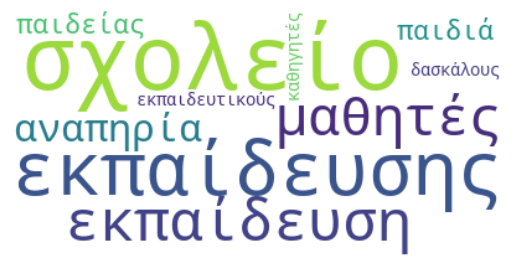

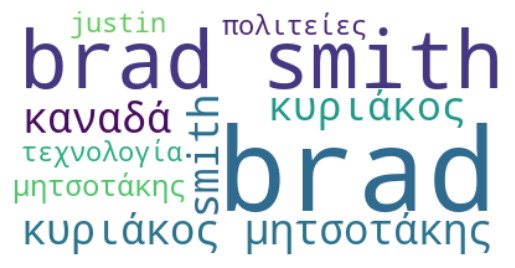

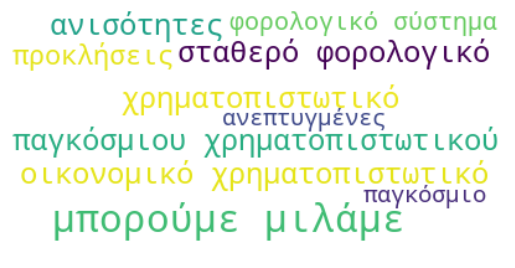

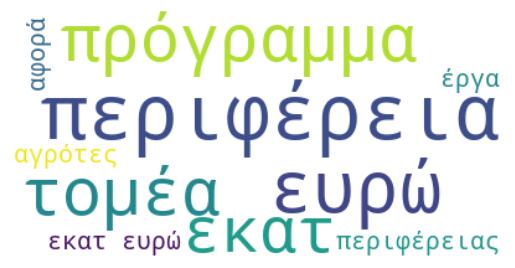

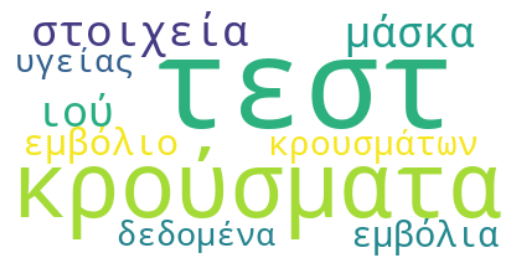

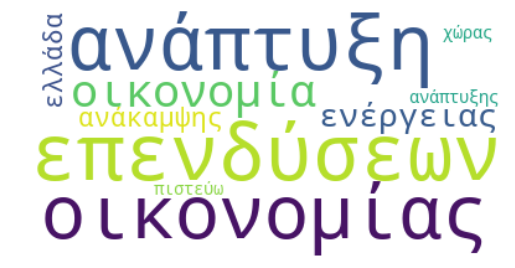

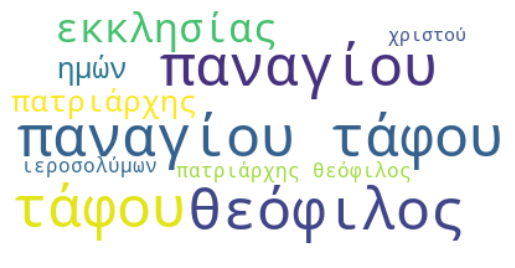

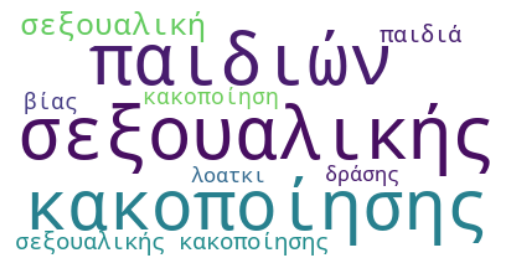

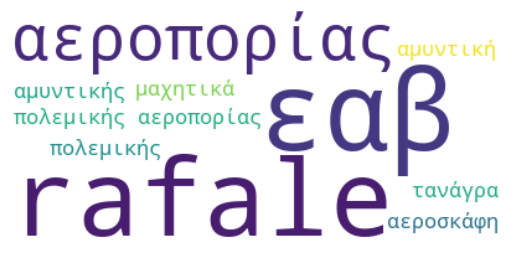

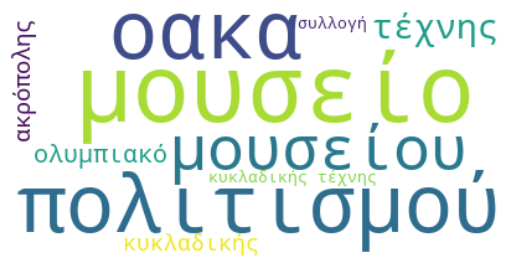

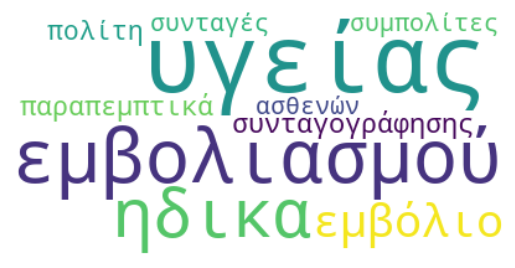

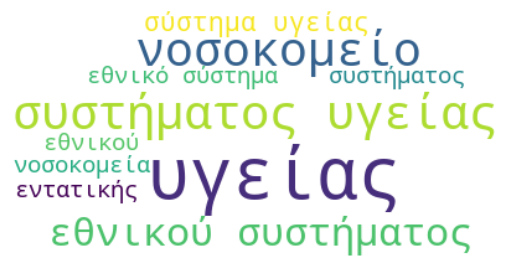

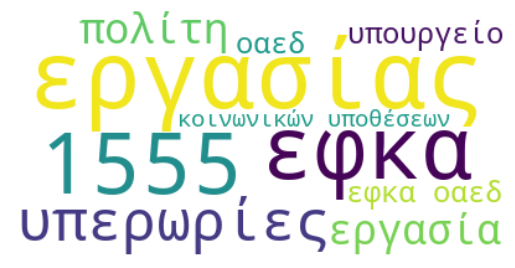

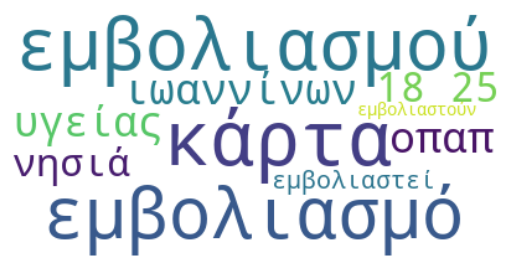

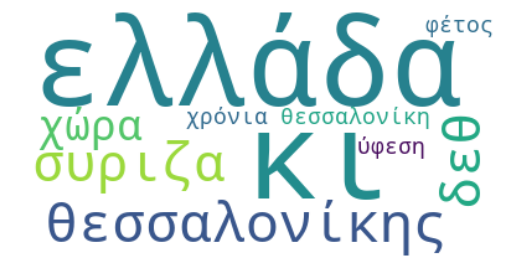

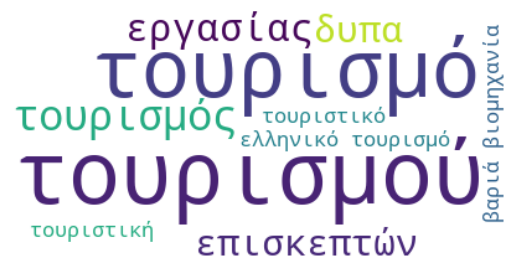

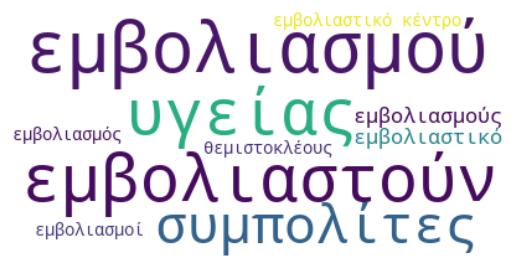

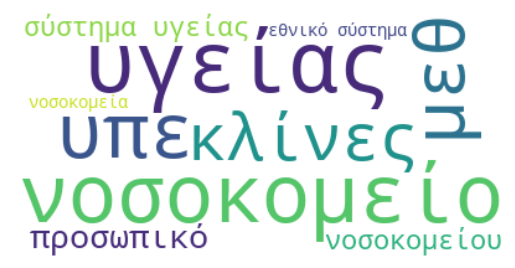

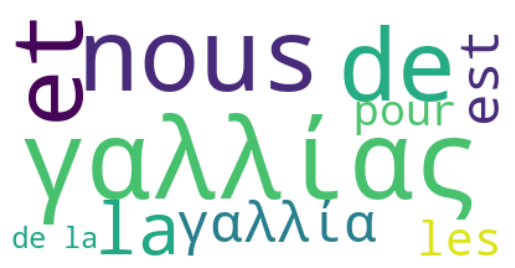

In [22]:
for topic in range(NUM_TOPICS-1):
    create_wordcloud(model_docs, topic)